<a href="https://colab.research.google.com/github/ItchelTG/CdeCMx/blob/master/Copia_de_Mexicali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # Load the numpy library
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, num2date, datetime
from matplotlib import rcParams as rcp

In [ ]:
rcp['lines.linewidth'] = 4 #Cambiar el tamaño de línea
rcp['font.family'] = 'sans serif'
rcp['font.size'] = 10

In [ ]:
!git clone https://github.com/cdcmx2020a/group_A_AlmaJair.git

Cloning into 'group_A_AlmaJair'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (227/227), done.
remote: Total 297 (delta 114), reused 215 (delta 65), pack-reused 0
Receiving objects: 100% (297/297), 43.24 MiB | 11.97 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [ ]:
cases = np.loadtxt('/content/group_A_AlmaJair/datos_covid/diario_estado.csv', delimiter=',')

In [ ]:
mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/casos_diarios_mexicali.csv',delimiter=',')

In [ ]:
time = mat[0,:]
str(mat[0,0])

'12012020.0'

In [ ]:
cases_mex = mat[1,:]

In [ ]:
time_final = np.zeros(time.shape[0])
for ii in range(time.shape[0]):
    if np.ma.is_masked(time[ii]) == False:
        if len(str(time[ii])) == 10: 
            time_final[ii] = date2num(datetime.datetime(np.int(str(time[ii])[4:-2]), np.int(str(time[ii])[2:4]), np.int(str(time[ii])[0:2])))
        else:
            time_final[ii] = date2num(datetime.datetime(np.int(str(time[ii])[3:-2]), np.int(str(time[ii])[1:3]),
                                                            np.int(str(time[ii])[0:1])))

In [ ]:
temp_mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/temp_diaria_2020_mxl.csv', delimiter=',')

In [ ]:
temp_mean = temp_mat[:,3] #Temperatura promedio
temp_min = temp_mat[:,4] #Temperatura mínima
temp_max = temp_mat[:,5] #Temperatura máxima

In [ ]:
year = temp_mat[:,0]
month = temp_mat[:,1]
day = temp_mat[:,2]
time_final_temp = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time_final_temp[ii] = date2num(datetime.datetime(np.int(year[ii]), np.int(month[ii]),
                         np.int(day[ii])))

In [ ]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [ ]:
cases_mex_runn = running_mean(cases_mex[1:], 14)

In [ ]:
temp_mex_runn = running_mean(temp_mean[1:], 14)

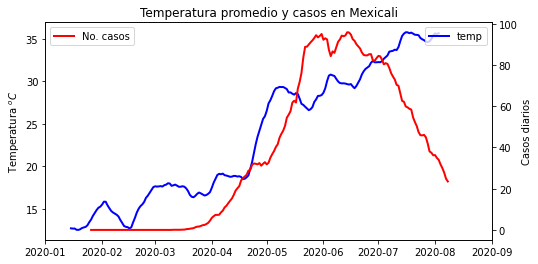

In [ ]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 4))
tit = 'Temperatura promedio y casos en Mexicali'
ax1 = ax 
ax1.plot(num2date(time_final_temp[len(temp_mean)-len(temp_mex_runn):]), temp_mex_runn, lw=2, color='b', label='temp')
ax1.legend(loc=1) 
ax2 = ax1.twinx()
ax2.plot(num2date(time_final[len(cases_mex)-len(cases_mex_runn):]), cases_mex_runn, lw=2, color='r', label='No. casos')
ax2.set_title(tit)
ax2.set_ylabel('Casos diarios')
ax2.legend(loc=2) 
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
ax2.set_xlim(fi1, fi2)
ax1.set_ylabel('Temperatura $^oC$')
plt.savefig('Mexicali.png', bbox_inches='tight')